In [53]:
import duckdb
import pandas as pd
import requests
import json
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "./diamonds_train.db"
conn = duckdb.connect(path, read_only=True)
df = conn.execute('show tables').fetch_df()
df

,name
0,diamonds_city
1,diamonds_clarity
2,diamonds_color
3,diamonds_cut
4,diamonds_dimensions
5,diamonds_properties
6,diamonds_transactional
7,sqlite_autoindex_diamonds_city_1
8,sqlite_autoindex_diamonds_clarity_1
9,sqlite_autoindex_diamonds_color_1


In [3]:
df1 = []

In [4]:
for i, row in df.iterrows():
    df1.append(conn.execute('SELECT * FROM ' + row[0]).fetch_df())
    if (i > 5):
        break
    print('\n')

In [5]:
df1[0]

,city_id,city
0,0013c01fe0d094209b8bd3d23b8f96dbabcd01ddd2a039...,Amsterdam
1,1e73b1647343b286269d517e6f07e6e07ccef10cd7b785...,Zurich
2,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,Las Vegas
3,5a59ef2e40c5f89adb8c0c6ad0a8019b0e252fff530cf2...,New York City
4,5dd272b4f316b776a7b8e3d0894b37e1e42be3d5d3b204...,Paris
5,68371d5bdaab31b5cbc25fbf94b8f9c1238294fc50e715...,Tel Aviv
6,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,Dubai
7,89c7286890f7347ab235234e74d406596a127ae3679042...,Kimberly
8,ba04d229e496b8383a4df91f5e77c194a95cf1a069b0b2...,Surat
9,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,Antwerp


In [6]:
df1[1]

,clarity_id,clarity
0,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...,SI2
1,3f9db06236e9719b61c826b612b882fa702ec81574e44c...,VVS2
2,66686ae1f0c9c400ba32dc600a34ff0aa173395bcbc2d8...,VVS1
3,7020fd7aaf1656dea5c0c0c3d4bb5a28ebf6243fba95d3...,IF
4,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...,SI1
5,c2818bc4e5ec4ae4a357a0df6fed73652e169ec676f7d4...,I1
6,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...,VS1
7,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...,VS2


In [7]:
df1[2]

,color_id,color
0,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,G
1,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,D
2,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,H
3,6da43b944e494e885e69af021f93c6d9331c78aa228084...,J
4,a83dd0ccbffe39d071cc317ddf6e97f5c6b1c87af91919...,I
5,a9f51566bd6705f7ea6ad54bb9deb449f795582d6529a0...,E
6,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,F


In [8]:
df1[3]

,cut_id,cut
0,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,Very Good
1,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,Ideal
2,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,Good
3,de88c121a82a06352bf1aaceba20578356408a334ba046...,Premium
4,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,Fair


In [9]:
df1[4]

,index_id,depth,table,x,y,z
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,62.4,58.0,6.83,6.79,4.25
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,63.0,57.0,4.35,4.38,2.75
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,65.5,55.0,5.62,5.53,3.65
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,63.8,56.0,4.68,4.72,3.00
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,60.5,59.0,6.55,6.51,3.95
...,...,...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,62.7,57.0,7.10,7.04,4.43
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,57.1,60.0,8.31,8.25,4.73
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,62.7,56.0,6.37,6.42,4.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,61.9,54.3,4.45,4.47,2.76


In [10]:
df1[5]

,index_id,cut_id,color_id,clarity_id
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,de88c121a82a06352bf1aaceba20578356408a334ba046...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,388655e25e91872329272fc10128ef5354b3b19a05d7e8...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,f0b2a1d0db08cc64f85d74f1d15c2191e0e49039f4d8f2...
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,f7b19afcde965ea4942b878d266f89f8ba9a5a833e60f7...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,3f39d5c348e5b79d06e842c114e6cc571583bbf44e4b0e...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,333e0a1e27815d0ceee55c473fe3dc93d56c63e3bee2b3...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,c939327ca16dcf97ca32521d8b834bf1de16573d21deda...,f67ab10ad4e4c53121b6a5fe4da9c10ddee905b978d378...,03c358cbd92e83278fd523f58dc6a9b4b198d00728af65...
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,44bd7ae60f478fae1061e11a7739f4b94d1daf917982d3...,bd4f4a250da88f87729febc739ae97f439a14f9d38f0e3...
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,4e3cfaa334cbafb57a399a98fad8d3812ece460018f457...,6da43b944e494e885e69af021f93c6d9331c78aa228084...,ef736c1f91cd1900c3d9cde925b1bf4f013adc0211a9ee...


In [11]:
df1[6]

,index_id,price,city_id,carat
0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...,4268,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.21
1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,505,89c7286890f7347ab235234e74d406596a127ae3679042...,0.32
2,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,2686,2bd25cd960aba8b706e2b67f2bb38b750ee5384b0e9883...,0.71
3,4e07408562bedb8b60ce05c1decfe3ad16b72230967de0...,738,89c7286890f7347ab235234e74d406596a127ae3679042...,0.41
4,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,4882,6c425048aa7badd9d84615bd8620ca1864efd81cfdb69d...,1.02
...,...,...,...,...
40450,f0bc79169405ebeb24e308055156b946ffd819db9b4f75...,10070,ca3aa21a5b70c3e88cc6336682c8c7da928a0c66a5ead4...,1.34
40451,339916a23bf22b052b54cb2a9b36ee8418c1c68b46acad...,12615,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,2.02
40452,46957922b99954654c1deb8d854c3f069bf118b2ce9415...,5457,89c7286890f7347ab235234e74d406596a127ae3679042...,1.01
40453,9d733392d362d5c6f1d9b9659b601c7d4b5a1c1c8df579...,456,89c7286890f7347ab235234e74d406596a127ae3679042...,0.33


In [12]:

my_df = conn.execute('SELECT dt.price ,dt.carat, dc.city,  dd."depth", dd."table" ,dd.x , dd.y , dd.z, dc2.clarity , dc3.color , dc4.cut  FROM diamonds_transactional dt INNER JOIN diamonds_properties dp ON dt.index_id = dp.index_id INNER JOIN diamonds_dimensions dd  ON dd.index_id = dt.index_id INNER JOIN diamonds_city dc ON dc.city_id = dt.city_id INNER JOIN diamonds_clarity dc2 ON dc2.clarity_id = dp.clarity_id INNER JOIN diamonds_color dc3 ON dc3.color_id = dp.color_id INNER JOIN diamonds_cut dc4 ON dc4.cut_id = dp.cut_id ').fetch_df()

In [13]:
# Aquí el dataframe que reune la información de la tabla de hechos, trabajar a partir de aquí en sacar insights
my_df

,price,carat,city,depth,table,x,y,z,clarity,color,cut
0,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,VS2,H,Very Good
1,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,VS1,G,Fair
2,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,SI1,D,Good
3,9057,1.52,Tel Aviv,61.2,57.0,7.45,7.39,4.54,SI2,F,Ideal
4,557,0.31,Zurich,61.8,54.2,4.33,4.37,2.69,VS1,H,Ideal
...,...,...,...,...,...,...,...,...,...,...,...
40450,1116,0.35,Amsterdam,62.2,58.0,4.52,4.45,2.79,IF,G,Premium
40451,975,0.40,Luxembourg,62.4,55.0,4.74,4.71,2.95,VS2,E,Ideal
40452,8572,1.57,Tel Aviv,61.1,61.0,7.46,7.43,4.55,SI2,G,Premium
40453,5154,0.73,Paris,61.4,56.0,5.80,5.81,3.56,VVS1,F,Ideal


In [36]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   clarity  40455 non-null  object 
 9   color    40455 non-null  object 
 10  cut      40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


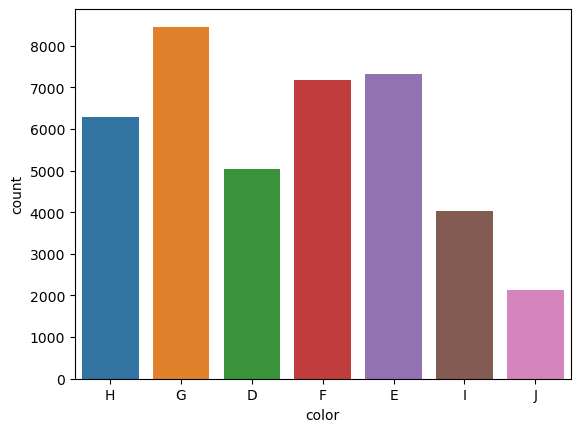

In [83]:
ax = sns.countplot(x="color", data=my_df)

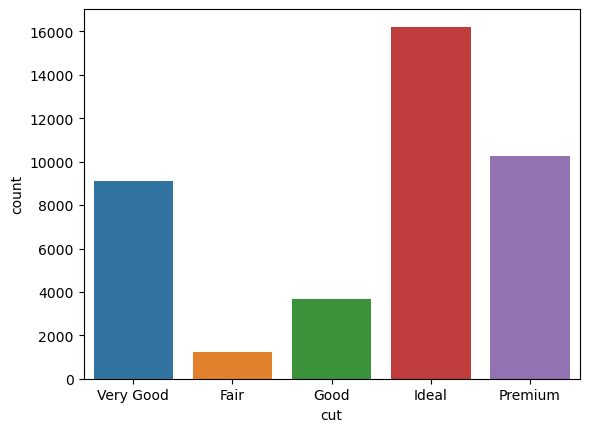

In [84]:
ax = sns.countplot(x="cut", data=my_df)

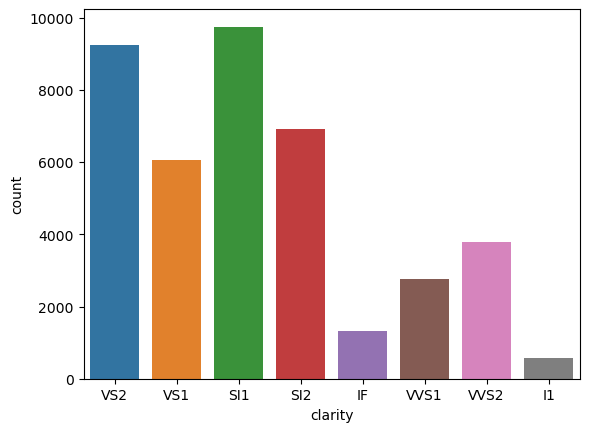

In [85]:
ax = sns.countplot(x="clarity", data=my_df)

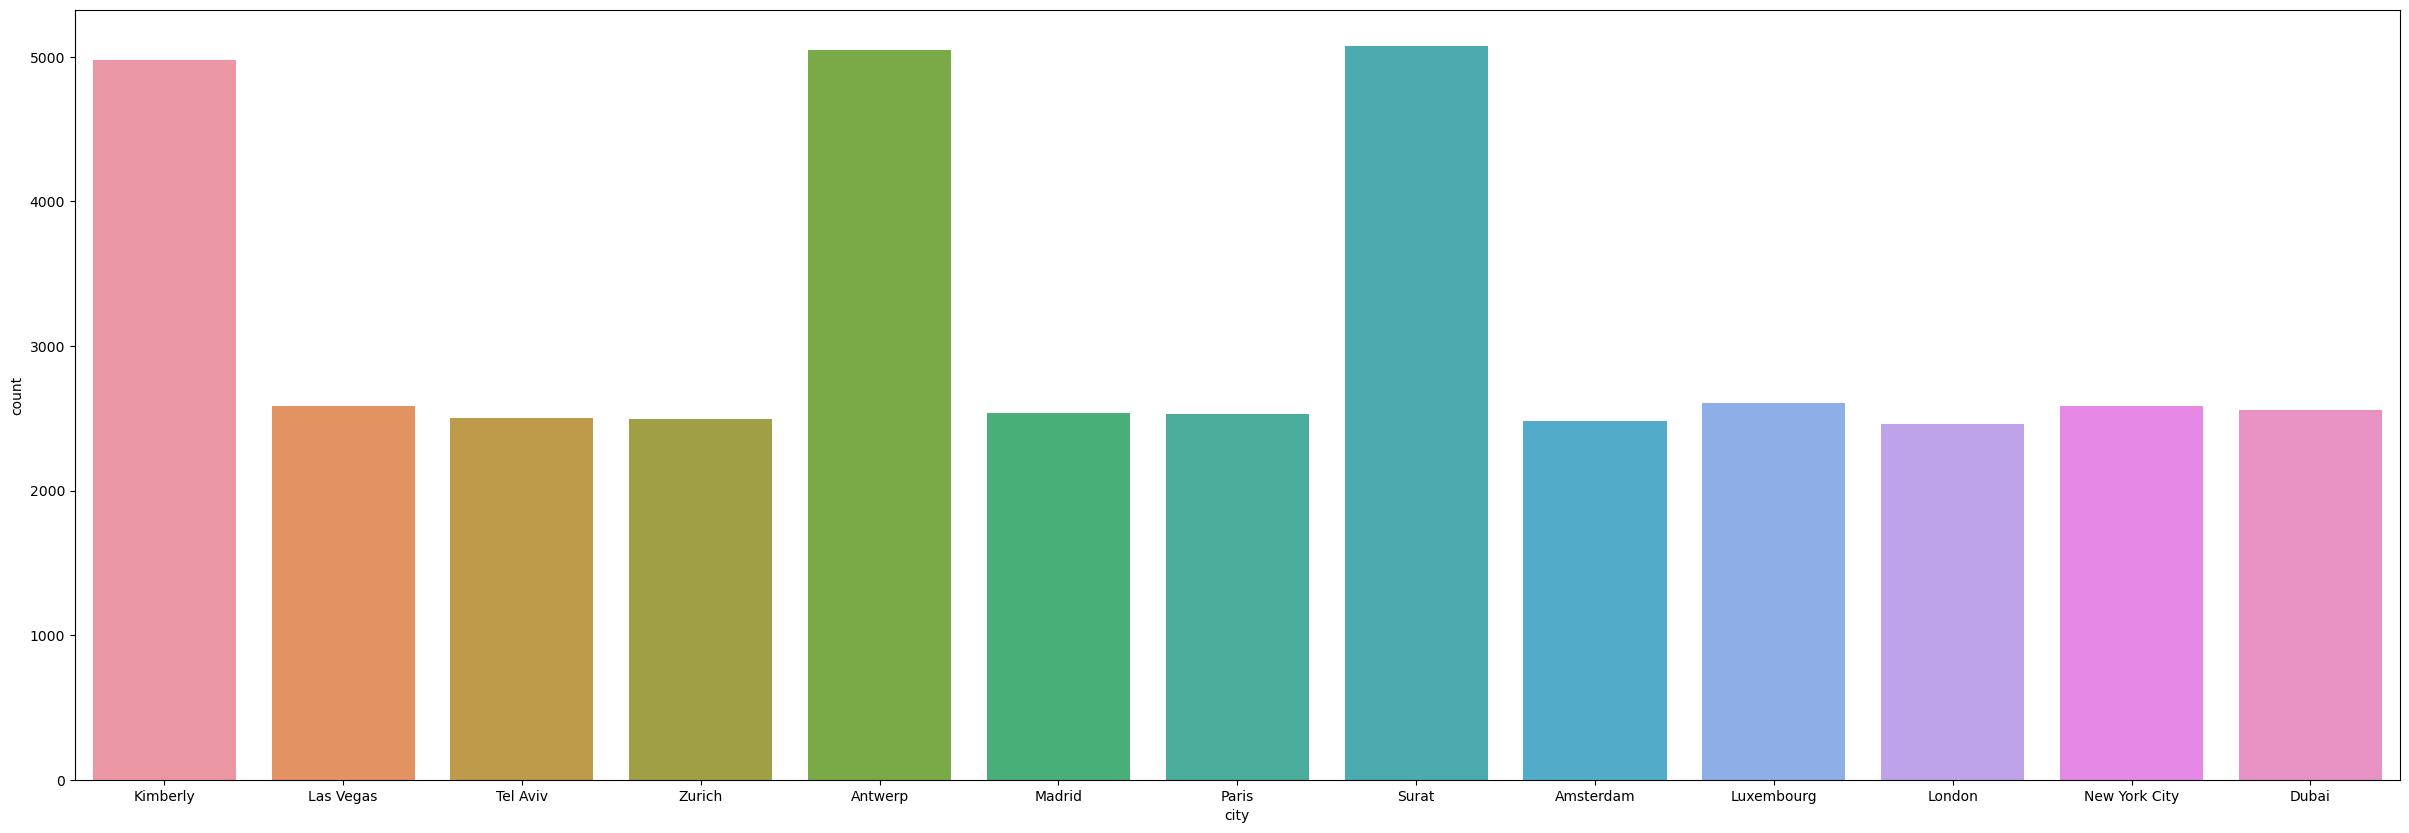

In [90]:
fig, ax = plt.subplots(figsize=(30, 10))
ax = sns.countplot(x="city", data=my_df)

In [92]:
my_df.mean(numeric_only=True)

price    3928.444469
carat       0.797706
depth      61.752841
table      57.446133
x           5.729392
y           5.732819
z           3.537154
dtype: float64

In [93]:
my_df.median(numeric_only=True)

price    2397.00
carat       0.70
depth      61.80
table      57.00
x           5.69
y           5.71
z           3.52
dtype: float64

In [95]:
my_df.std(numeric_only=True)

price    3992.416147
carat       0.475544
depth       1.431725
table       2.233535
x           1.124453
y           1.146650
z           0.697062
dtype: float64

In [96]:
my_df.min(numeric_only=True)

price    326.0
carat      0.2
depth     43.0
table     43.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [97]:
my_df.max(numeric_only=True)

price    18823.00
carat        4.50
depth       79.00
table       95.00
x           10.23
y           58.90
z            8.06
dtype: float64

In [71]:
fig = px.histogram(df , x="price")
fig.show()

In [22]:
df_color = my_df.groupby(['color']).mean(numeric_only=True).sort_values(by='price',
                                      ascending=False).reset_index()

In [23]:
df_color

,color,price,carat,depth,table,x,y,z
0,J,5346.234112,1.166500,61.909626,57.790701,6.527285,6.525570,4.039879
1,I,5090.868800,1.026791,61.873214,57.562574,6.216099,6.215675,3.842078
2,H,4476.469014,0.910355,61.827481,57.533503,5.981431,5.984082,3.693629
3,G,4023.214902,0.774382,61.752785,57.287889,5.684102,5.687183,3.508856
4,F,3677.355720,0.731503,61.689954,57.409726,5.601393,5.607254,3.455930
5,D,3134.943157,0.653036,61.721886,57.344959,5.404704,5.409541,3.336782
6,E,3088.342526,0.658835,61.659836,57.494567,5.413894,5.418651,3.338709


In [24]:
fig = px.bar(df_color, x='color', y='price')
fig.show()

In [29]:
def row_filter(df, cat_var, cat_values):
    '''
    Return: a Pandas dataframe object where columns have been filtered by a set of values from a given column (categorical variable). 
            The resulting dataframe will be sorted descending from highest to lowest amount of deaths and the index column will be reset.
    Input parameters:
        - df -> Pandas dataframe object: a dataframe with categorical variables.
        - cat_var -> string: a string with the name of a categorical variable (e.g.: 'Sexo').
        - cat_values -> list object: a list of values (string) which rows will be INCLUDED into the returned dataframe (e.g.: ['Hombres', 'Mujeres'])
    '''
    df = df[df[cat_var].isin(cat_values)].sort_values(by='price', ascending=False)
    return df.reset_index(drop=True)


In [41]:
# Representación de histogramas por cada color de diamante. Los diamantes J e I son los más caros.

for i in ['J','I','H','G','F','D','E']:
    df = row_filter(my_df, 'color', [i])
    fig = px.histogram(df , x="price", title=i)
    fig.show()
    #print(row_filter(my_df, 'color', [i]))


<Axes: xlabel='color', ylabel='price'>

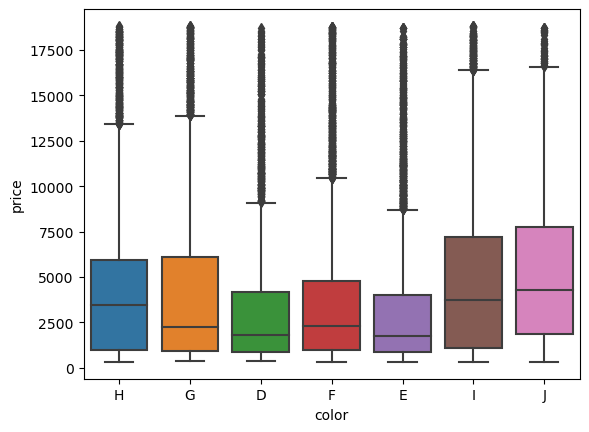

In [57]:
sns.boxplot(data=my_df, x="color", y="price")

<Axes: xlabel='color', ylabel='price'>

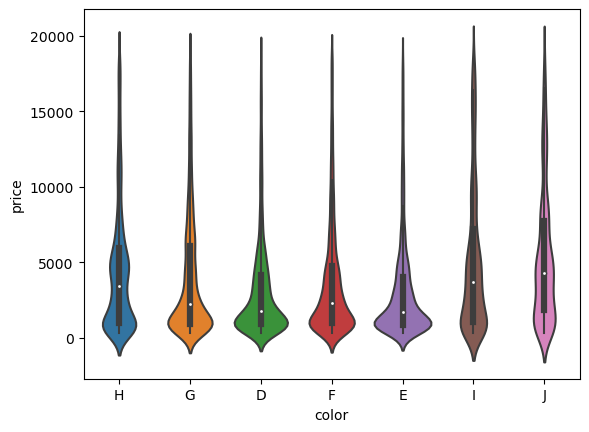

In [58]:
sns.violinplot(data=my_df, x="color", y="price")

<Axes: xlabel='clarity', ylabel='price'>

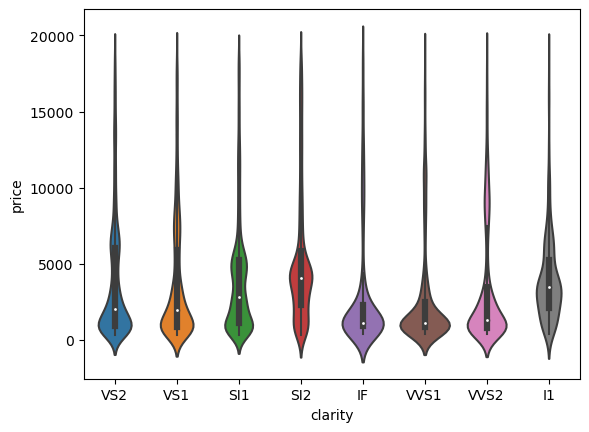

In [59]:
sns.violinplot(data=my_df, x="clarity", y="price")

<Axes: xlabel='cut', ylabel='price'>

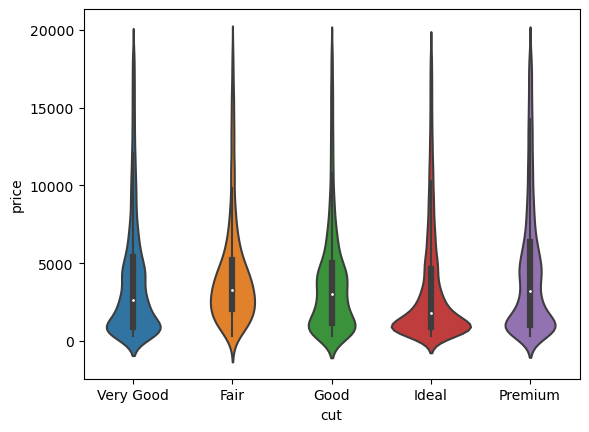

In [67]:
sns.violinplot(data=my_df, x="cut", y="price")

In [42]:
df_clarity = my_df.groupby(['clarity']).mean(numeric_only=True).sort_values(by='price',
                                      ascending=False).reset_index()

In [43]:
df_clarity


,clarity,price,carat,depth,table,x,y,z
0,SI2,5101.044307,1.081472,61.779954,57.909150,6.408255,6.407433,3.952679
1,SI1,3999.856908,0.851174,61.859668,57.648549,5.888604,5.888270,3.639990
2,I1,3971.206039,1.299591,62.804796,58.237478,6.782771,6.729485,4.227318
3,VS2,3913.590182,0.762661,61.721345,57.404520,5.655557,5.656696,3.489658
4,VS1,3796.813551,0.721553,61.678948,57.285410,5.555437,5.562798,3.428205
5,VVS2,3240.978942,0.591777,61.658884,57.031561,5.206976,5.220753,3.213917
6,IF,2797.897513,0.499849,61.511454,56.496684,4.953451,4.975011,3.052427
7,VVS1,2559.498558,0.506994,61.606921,56.929740,4.973554,4.988504,3.068893


In [44]:
fig = px.bar(df_clarity, x='clarity', y='price')
fig.show()

In [46]:
df_city = my_df.groupby(['city']).mean(numeric_only=True).sort_values(by='price',
                                      ascending=False).reset_index()

In [47]:
df_city

,city,price,carat,depth,table,x,y,z
0,Zurich,4020.638767,0.804854,61.725350,57.383260,5.749167,5.753320,3.550196
1,Dubai,3986.793050,0.805088,61.764818,57.415424,5.754623,5.756868,3.553745
2,Amsterdam,3981.749296,0.795292,61.749014,57.416016,5.723026,5.724358,3.533722
3,Kimberly,3980.353095,0.801509,61.770398,57.474116,5.736527,5.739616,3.542281
4,Madrid,3977.653937,0.800969,61.753071,57.437441,5.736827,5.738465,3.539555
5,Surat,3966.823379,0.802663,61.742618,57.471989,5.740162,5.742170,3.542687
6,London,3952.769387,0.803423,61.731222,57.488266,5.738242,5.739919,3.539265
7,New York City,3927.937355,0.803318,61.745592,57.432483,5.744339,5.745124,3.543929
8,Las Vegas,3919.199536,0.794331,61.785073,57.448260,5.718391,5.719091,3.531961
9,Paris,3906.252569,0.794909,61.744704,57.416166,5.714798,5.735921,3.527708


<Axes: >

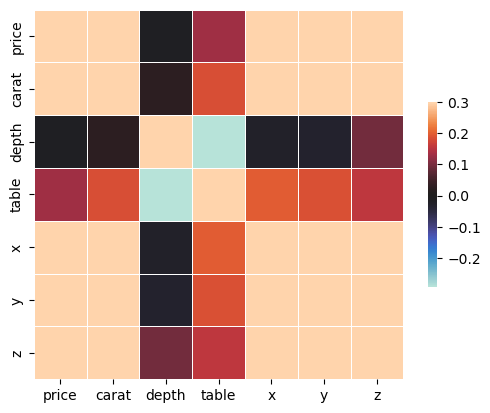

In [55]:
sns.heatmap(my_df.corr(numeric_only=True), vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [63]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=30, cmap=cmap, **kwargs)
    
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.map.html


In [66]:

fig = px.scatter(df, x="carat", y="price", trendline="ols")
fig.show()

In [69]:
df_J = row_filter(my_df, 'color', ['J'])
df_J

,price,carat,city,depth,table,x,y,z,clarity,color,cut
0,18710,3.01,Tel Aviv,59.7,58.0,9.41,9.32,5.59,SI2,J,Premium
1,18701,3.51,Kimberly,62.5,59.0,9.66,9.63,6.03,VS2,J,Premium
2,18692,2.43,Kimberly,62.2,57.0,8.63,8.54,5.34,VS2,J,Premium
3,18615,2.42,Antwerp,61.3,59.0,8.61,8.58,5.27,VS2,J,Premium
4,18594,2.29,Kimberly,61.4,60.0,8.49,8.45,5.20,IF,J,Premium
...,...,...,...,...,...,...,...,...,...,...,...
2135,351,0.30,Madrid,63.8,56.0,4.23,4.26,2.71,SI1,J,Good
2136,344,0.31,Surat,62.2,54.0,4.35,4.37,2.71,SI2,J,Ideal
2137,340,0.23,Surat,62.8,56.0,3.93,3.90,2.46,VS1,J,Ideal
2138,339,0.30,Zurich,64.0,55.0,4.25,4.28,2.73,SI1,J,Good


In [74]:
# A más kilates más valor
fig = px.scatter(df_J, x="carat", y="price", trendline="ols", marginal_x="histogram", marginal_y="histogram")
fig.show()

In [76]:
df2 = row_filter(my_df, 'city', ['Madrid'])
df2

,price,carat,city,depth,table,x,y,z,clarity,color,cut
0,18818,2.00,Madrid,63.5,56.0,7.90,7.97,5.04,SI1,G,Very Good
1,18756,2.61,Madrid,62.1,56.0,8.85,8.73,5.46,SI2,I,Ideal
2,18705,2.01,Madrid,61.2,57.2,8.08,8.14,4.97,SI2,G,Premium
3,18700,1.28,Madrid,60.7,57.0,7.09,6.99,4.27,IF,E,Ideal
4,18691,1.50,Madrid,60.7,59.0,7.31,7.38,4.46,VS2,G,Very Good
...,...,...,...,...,...,...,...,...,...,...,...
2535,361,0.32,Madrid,64.0,54.0,4.33,4.36,2.78,I1,D,Good
2536,360,0.30,Madrid,62.0,55.0,4.32,4.33,2.68,SI2,I,Ideal
2537,360,0.28,Madrid,61.5,56.0,4.21,4.24,2.60,SI1,H,Very Good
2538,353,0.23,Madrid,61.0,57.0,3.94,3.96,2.41,VS1,H,Very Good


In [77]:
fig = px.scatter(df2, x="carat", y="price", trendline="ols", marginal_x="histogram", marginal_y="histogram")
fig.show()